In [1]:
from datasets import load_dataset

ds_name = "davidberenstein1957/ultra_feedback_dutch_cleaned_helm_instruct_geitje_ultra_vs_gpt4_turbo"
ds = load_dataset(ds_name)

In [3]:
def get_columns(model):
    return [
        column for column in ds.column_names["train"]
        if model in column and "rating" in column and "Harmlessness" not in column
    ]
columns_nl = get_columns("GEITje")
columns_en = get_columns("gpt-4")
columns_nl, columns_en

(['rating_Helpfulness_GEITje-7B-ultra',
  'rating_Understandability_GEITje-7B-ultra',
  'rating_Completeness_GEITje-7B-ultra',
  'rating_Conciseness_GEITje-7B-ultra',
  'rating_dutchness_GEITje-7B-ultra'],
 ['rating_Helpfulness_gpt-4-turbo',
  'rating_Understandability_gpt-4-turbo',
  'rating_Completeness_gpt-4-turbo',
  'rating_Conciseness_gpt-4-turbo',
  'rating_dutchness_gpt-4-turbo'])

In [6]:
ds_processed = ds.map(
    lambda x: {
        "average_score_nl": sum(
            [x[column] for column in columns_nl if x[column]]
        )
        / len(columns_nl),
        "average_score_en": sum(
            [x[column] for column in columns_en if x[column]]
        )
        / len(columns_en),
    }
)
ds_processed

DatasetDict({
    train: Dataset({
        features: ['GEITje-7B-ultra', 'TowerInstruct-13B-v0.1', 'TowerInstruct-7B-v0.2', 'geitje-7b-chat', 'gpt-4-turbo', 'llama-2-13b-chat-dutch', 'prompt_english', 'prompt', 'labelling_model', 'labelling_prompt', 'raw_labelling_response', 'rating_Helpfulness_GEITje-7B-ultra', 'rationale_Helpfulness_GEITje-7B-ultra', 'generations_Helpfulness_GEITje-7B-ultra', 'rating_Understandability_GEITje-7B-ultra', 'rationale_Understandability_GEITje-7B-ultra', 'generations_Understandability_GEITje-7B-ultra', 'rating_Completeness_GEITje-7B-ultra', 'rationale_Completeness_GEITje-7B-ultra', 'generations_Completeness_GEITje-7B-ultra', 'rating_Conciseness_GEITje-7B-ultra', 'rationale_Conciseness_GEITje-7B-ultra', 'generations_Conciseness_GEITje-7B-ultra', 'rating_Harmlessness_GEITje-7B-ultra', 'rationale_Harmlessness_GEITje-7B-ultra', 'generations_Harmlessness_GEITje-7B-ultra', 'rating_dutchness_GEITje-7B-ultra', 'rationale_dutchness_GEITje-7B-ultra', 'generations_du

In [15]:
def win_rate_per_column_pair(column_nl, columns_en):
    wins = []
    for idx in range(len(ds_processed["train"])):
        value_nl = ds_processed["train"][idx][column_nl]
        value_en = ds_processed["train"][idx][columns_en]
        if value_nl and value_en:
            if value_nl > value_en:
                wins.append(1)
            else:
                wins.append(0)
    return sum(wins) / len(wins)

for column_nl, column_en in zip(columns_nl+["average_score_nl"], columns_en+["average_score_en"]):
    win_rate = win_rate_per_column_pair(column_nl, column_en)
    print(f"{column_nl} wins {win_rate:.2%} of the time")

rating_Helpfulness_GEITje-7B-ultra wins 1.03% of the time
rating_Understandability_GEITje-7B-ultra wins 2.00% of the time
rating_Completeness_GEITje-7B-ultra wins 0.00% of the time
rating_Conciseness_GEITje-7B-ultra wins 2.00% of the time
rating_dutchness_GEITje-7B-ultra wins 4.04% of the time
average_score_nl wins 4.00% of the time


In [17]:
def average_per_column(column):
    values = [x[column] for x in ds_processed["train"] if x[column]]
    return sum(values) / len(values)

for column in columns_nl+["average_score_nl"] + columns_en+["average_score_en"]:
    average = average_per_column(column)
    print(f"Average {column}: {average:.2f}")

Average rating_Helpfulness_GEITje-7B-ultra: 2.88
Average rating_Understandability_GEITje-7B-ultra: 3.43
Average rating_Completeness_GEITje-7B-ultra: 2.92
Average rating_Conciseness_GEITje-7B-ultra: 2.58
Average rating_dutchness_GEITje-7B-ultra: 2.82
Average average_score_nl: 2.91
Average rating_Helpfulness_gpt-4-turbo: 3.95
Average rating_Understandability_gpt-4-turbo: 4.70
Average rating_Completeness_gpt-4-turbo: 4.16
Average rating_Conciseness_gpt-4-turbo: 3.86
Average rating_dutchness_gpt-4-turbo: 4.31
Average average_score_en: 4.19


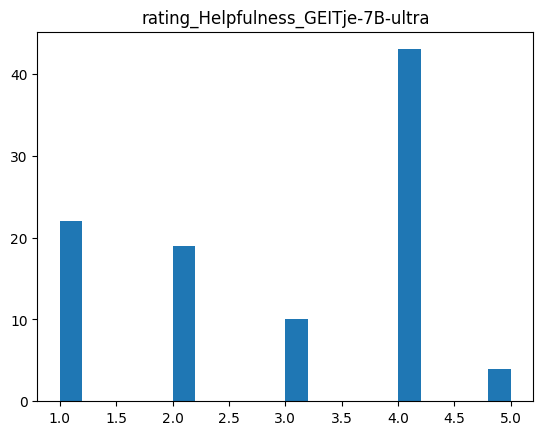

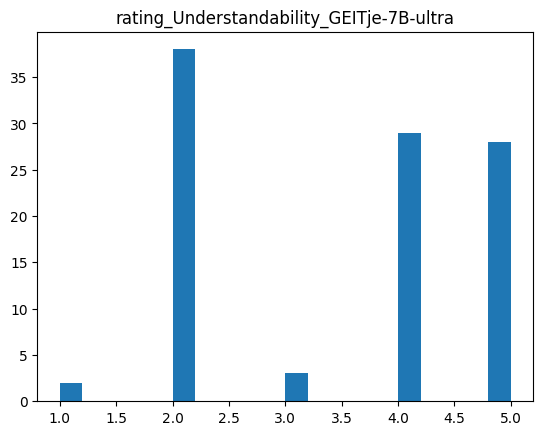

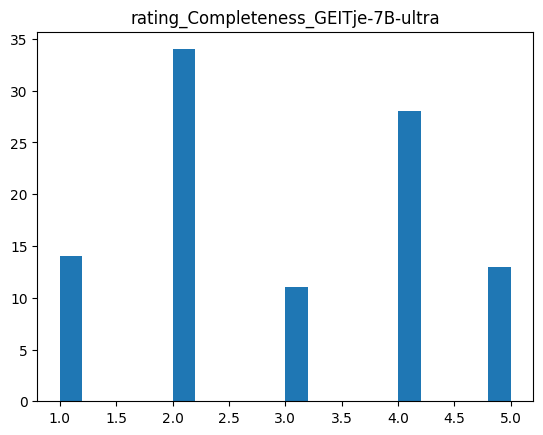

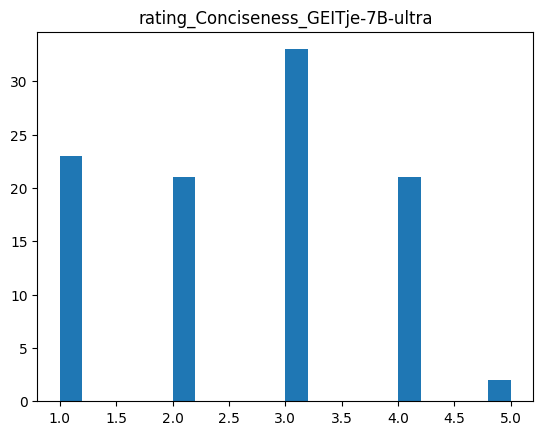

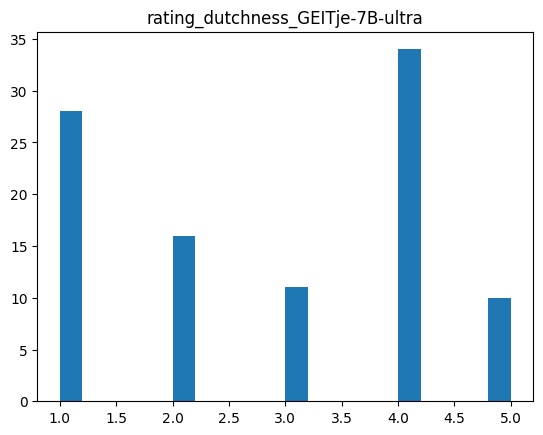

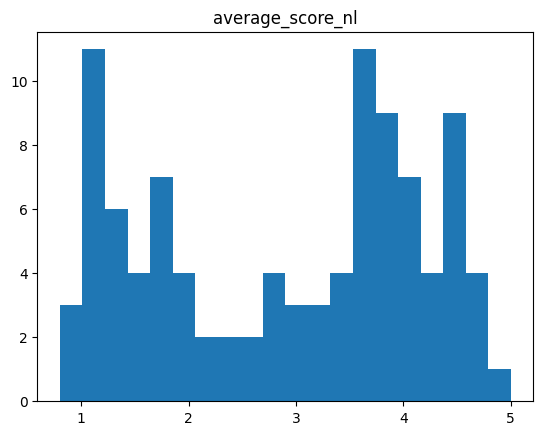

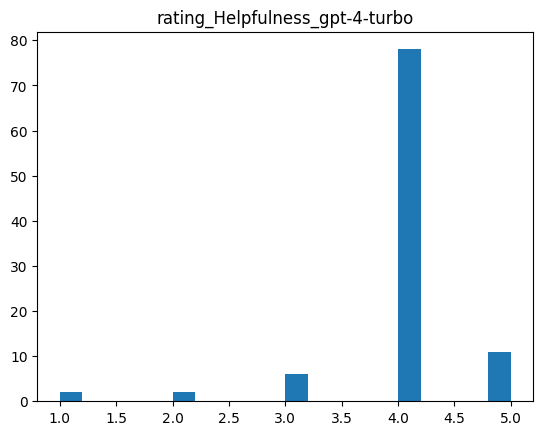

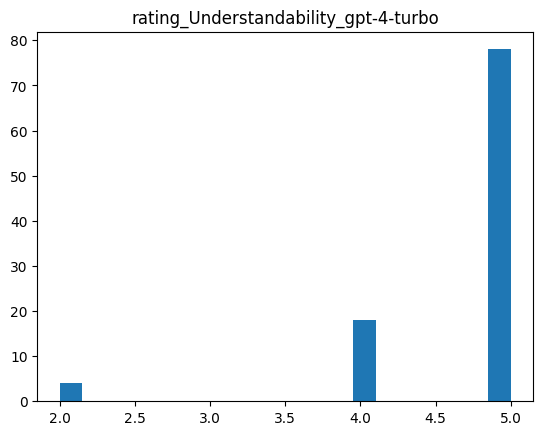

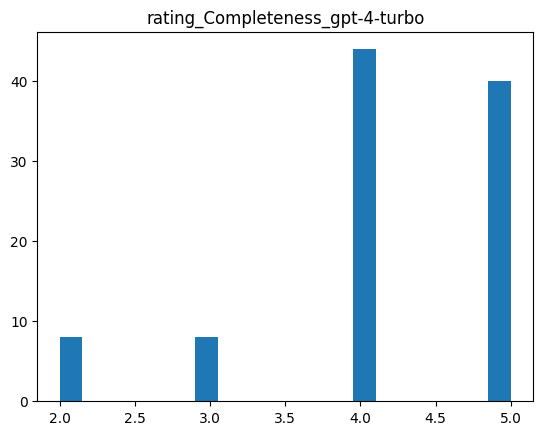

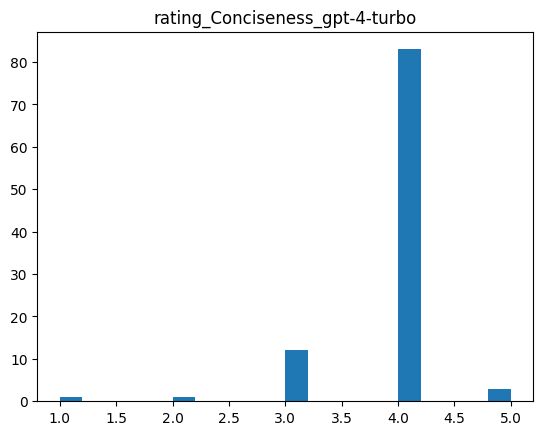

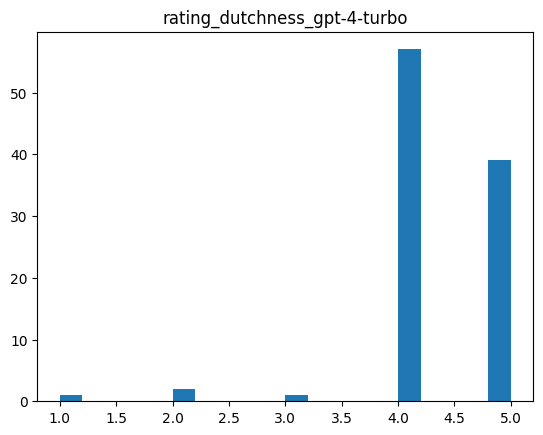

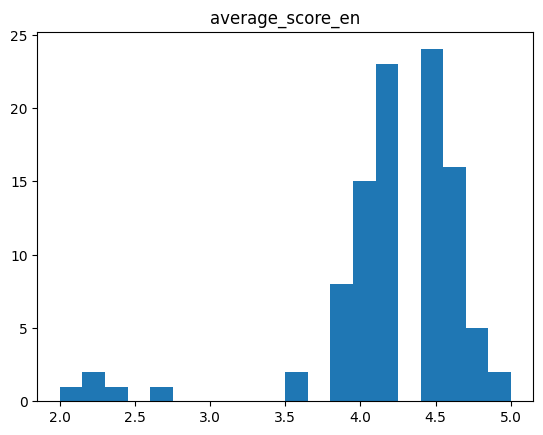

In [19]:
# create histograms
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(column):
    values = [x[column] for x in ds_processed["train"] if x[column]]
    plt.hist(values, bins=20)
    plt.title(column)
    plt.show()

for column in columns_nl+["average_score_nl"] + columns_en+["average_score_en"]:
    plot_histogram(column)